## Estudo comparativo de treino para o yolov{8,9,10}
>requisitos para rodar o dataset

* token do dataset do roboflow

* conexao com o drive para conseguir salvar os resultados dos testes e pesos

## Benchmark da ultralytics entre as versões

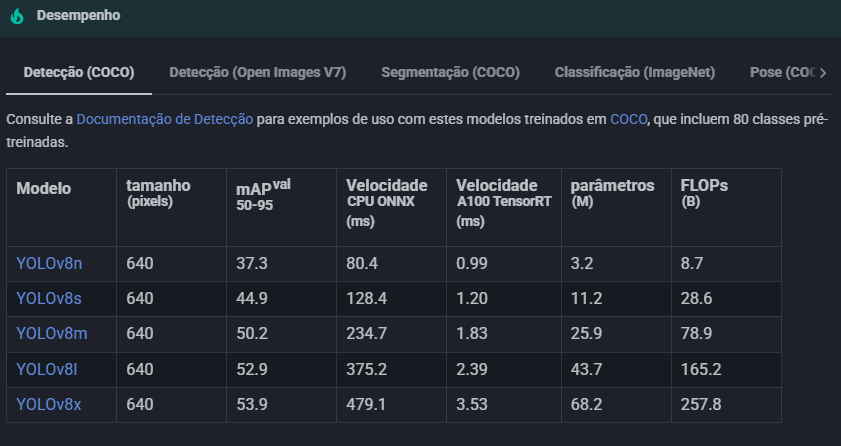

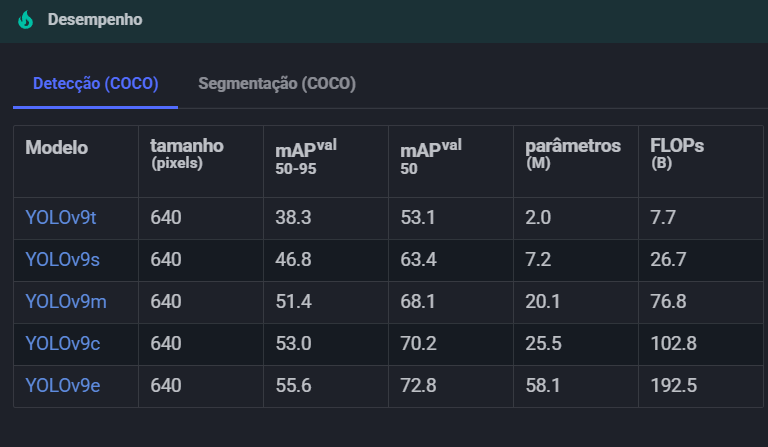


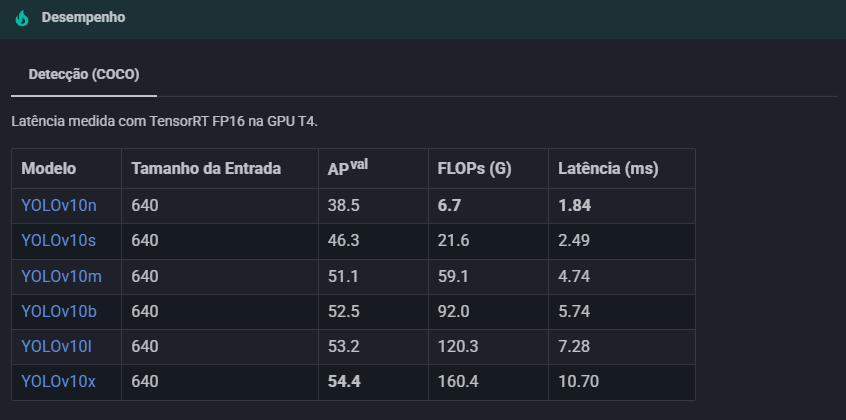
---



## Environment setup

In [ ]:
#deps
!pip3 install -q torch torchvision --index-url https://download.pytorch.org/whl/cu126
!pip3 install -q roboflow supervision ultralytics opencv-python


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
ROBOFLOW_DATASET_VERSION=5

In [12]:
import os
from dotenv import load_dotenv
load_dotenv()
# from google.colab import userdata

ROBOFLOW_API_KEY = os.getenv("ROBOFLOW_API_KEY") or userdata.get('ROBOFLOW_API_KEY');

if(not ROBOFLOW_API_KEY):
    raise ValueError("ROBOFLOW_API_KEY não encontrada!!.")

In [ ]:
#monta o volume do google drive para conseguir jogar a pasta de treino para dentro dele mais tarde .:. so funciona no colab
from google.colab import drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google'

### Check GPU availability


In [ ]:
!nvidia-smi

Mon Nov 17 13:57:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.83                 Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   40C    P8              1W /  105W |      56MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

c:\workspace\faculda_10_sem\VisaoComputacionalProjeto\computerVision-forbiddenObjects\jupyter


## Download dataset from Roboflow Universe

In [13]:
from roboflow import download_dataset, Roboflow

rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("ethos-ugyxt").project("ac2-visao-bfkss")
version = project.version(ROBOFLOW_DATASET_VERSION)
dataset = version.download("yolov9")#aqui é so para saber qual vai ser o formato do dataset, o v9 ja é compativel com os outros modelos mais novos

print(dataset)


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!ls {dataset.location}

'ls' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [ ]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

'sed' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'sed' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'sed' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
'sed' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


In [ ]:
!cat {dataset.location}/data.yaml


'cat' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
A sintaxe do comando est� incorreta.


In [ ]:
#dowload args
!curl -O  https://raw.githubusercontent.com/Nathan-Rgs/computerVision-forbiddenObjects/dev/jupyter/arg.yml

!cat arg.yml

raise InterruptedError('Mude o args os args baixados antes de ir para o treinamento')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  1442  100  1442    0     0   1865      0 --:--:-- --:--:-- --:--:--  1867
'cat' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.


InterruptedError: Mude o args os args baixados antes de ir para o treinamento

## Fine-tune YOLO models


In [ ]:
from ultralytics import YOLO

In [ ]:

model_v9 = YOLO('yolov9m.pt')

project="Benchmark_Visao"
name="Run_YOLOv9"

results_v9 = model_v9.train(
    data=f'{dataset.location}/data.yaml',
    cfg="arg.yml",
    project=project,
    name=name
)

In [ ]:

model_v8 = YOLO('yolov8m.pt')

project="Benchmark_Visao"
name="Run_YOLOv8"

results_v8 = model_v8.train(
    data=f'{dataset.location}/data.yaml',
    cfg="arg.yml",
    project=project,
    name=name
)

In [ ]:

model_v10 = YOLO('yolov10m.pt')

project="Benchmark_Visao"
name="Run_YOLOv10"

results_v10 = model_v10.train(
    data=f'{dataset.location}/data.yaml',
    cfg="arg.yml",
    project=project,
    name=name
)

In [ ]:
# Define the source directory (where the training results are saved)
SOURCE_DIR=f"/content/{project}"

# Define the destination directory on Google Drive
DEST_DIR=f"/content/drive/MyDrive/Benchmark_Visao_Results"

# Create the destination directory on Google Drive if it doesn't exist
!mkdir -p "$DEST_DIR"

# Copy the contents of the source directory to the destination directory
!cp -r "$SOURCE_DIR" "$DEST_DIR"
!cp arg.yml "$DEST_DIR"
!echo "Training results copied to Google Drive: $DEST_DIR"

Training results copied to Google Drive: /content/drive/MyDrive/Benchmark_Visao_Results


## Evaluate fine-tuned

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

# List the directories created by the training runs
!ls /content/Benchmark_Visao/

Run_YOLOv10  Run_YOLOv8  Run_YOLOv9


## Evaluate fine-tuned models

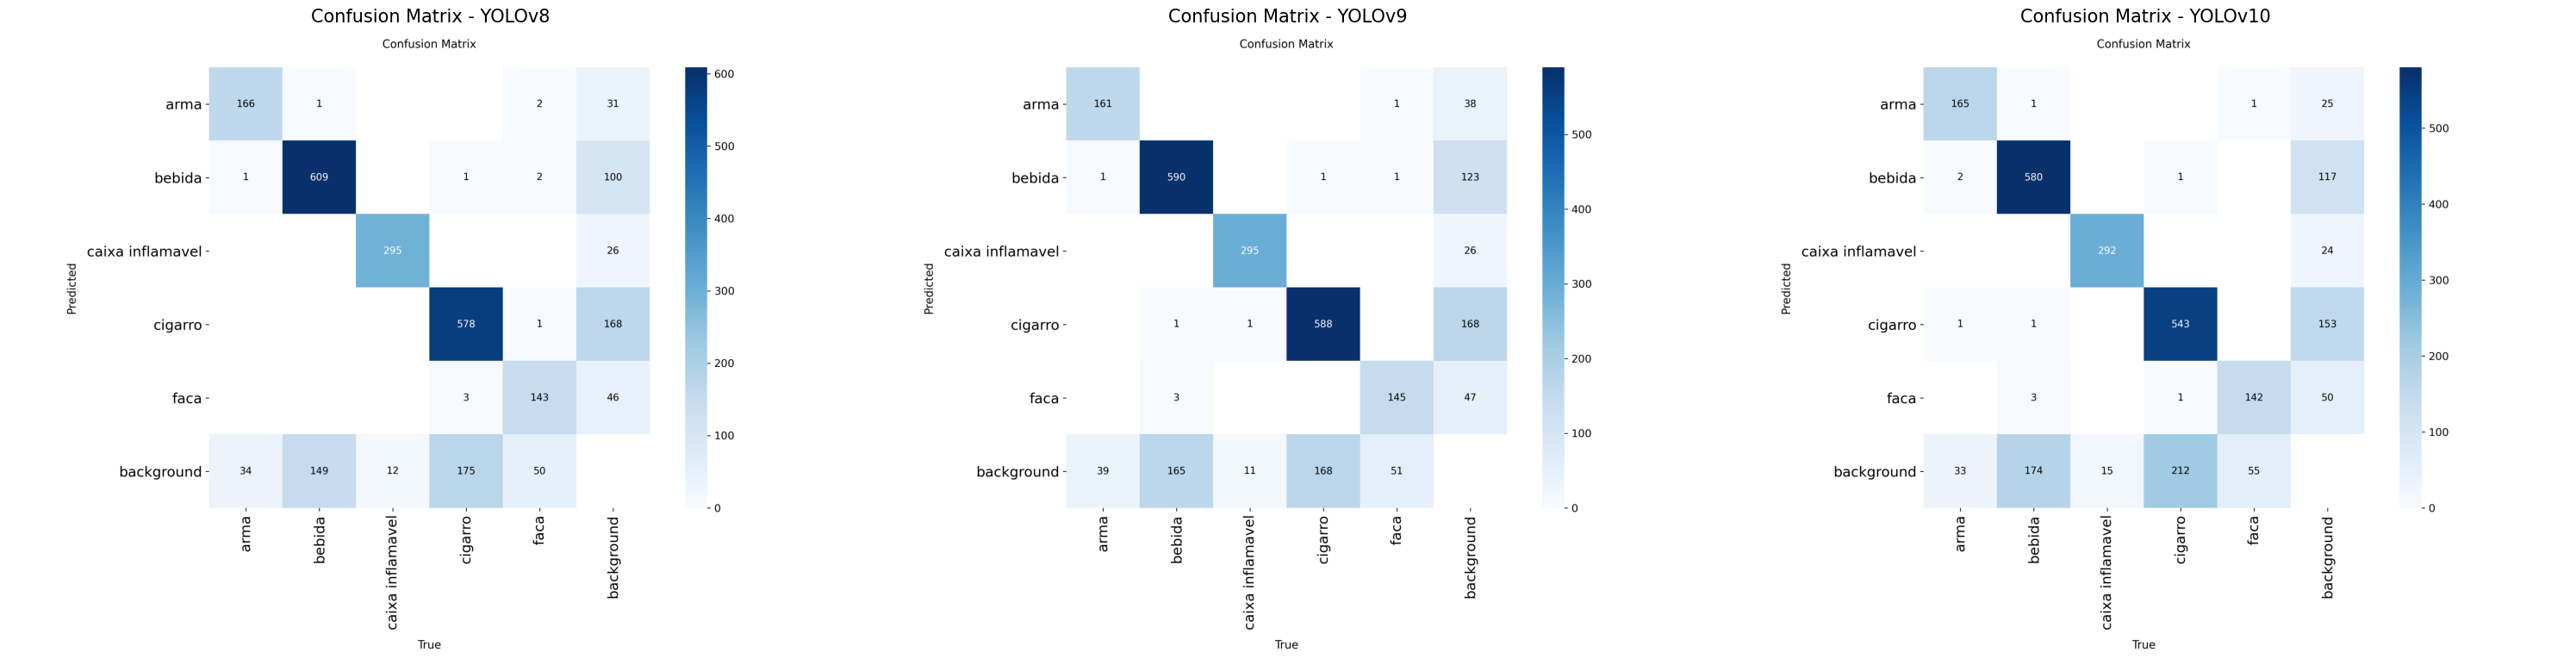

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. Caminhos (mantive os seus)
path_yolo8 = f'{HOME}/Benchmark_Visao/Run_YOLOv8/confusion_matrix.png'
path_yolo9 = f'{HOME}/Benchmark_Visao/Run_YOLOv9/confusion_matrix.png'
path_yolo10 = f'{HOME}/Benchmark_Visao/Run_YOLOv10/confusion_matrix.png'

# 2. Carregue as imagens
img8 = mpimg.imread(path_yolo8)
img9 = mpimg.imread(path_yolo9)
img10 = mpimg.imread(path_yolo10)

# 3. Crie a estrutura: MUDANÇA PARA (1, 3) e aumento da largura (30, 10)
fig, axs = plt.subplots(1, 3, figsize=(30, 10))

# 4. Configure YOLOv8 (Índice 0)
axs[0].imshow(img8)
axs[0].set_title('Confusion Matrix - YOLOv8', fontsize=15)
axs[0].axis('off')

# 5. Configure YOLOv9 (MUDANÇA PARA Índice 1)
axs[1].imshow(img9)
axs[1].set_title('Confusion Matrix - YOLOv9', fontsize=15)
axs[1].axis('off')

# 6. Configure YOLOv10 (MUDANÇA PARA Índice 2)
axs[2].imshow(img10)
axs[2].set_title('Confusion Matrix - YOLOv10', fontsize=15)
axs[2].axis('off')

# 7. Exibe
plt.tight_layout()
plt.show()

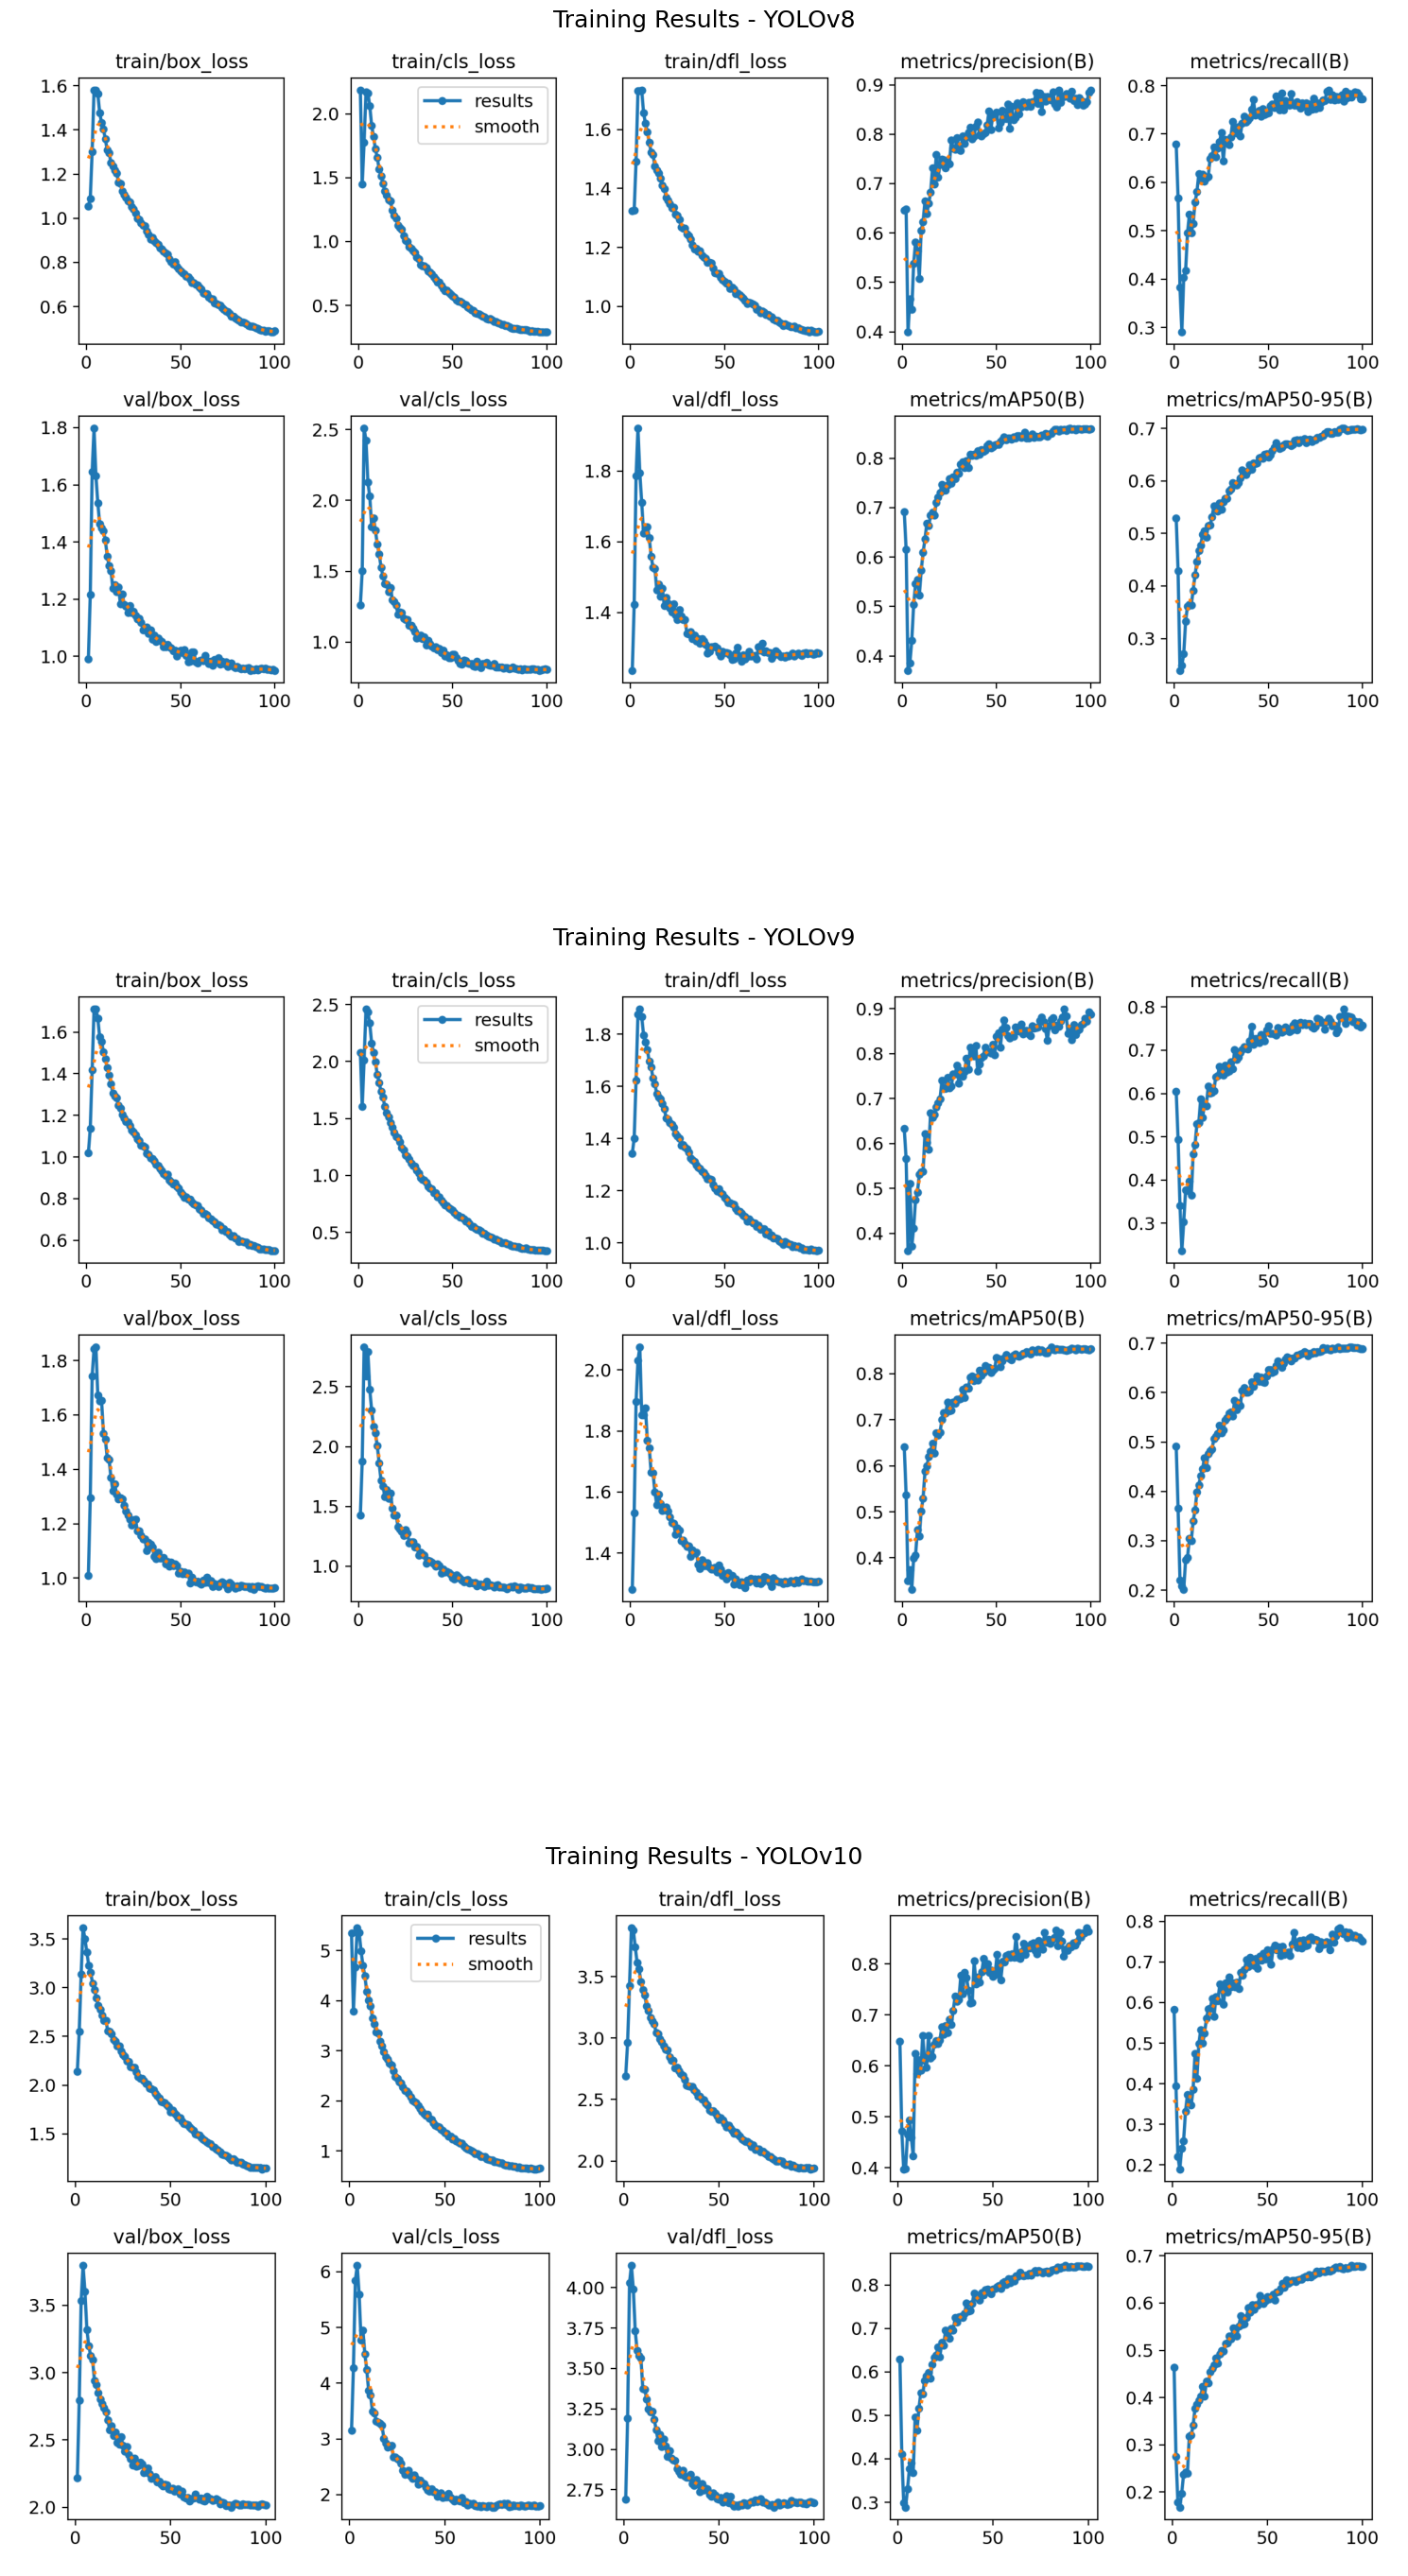

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# 1. Defina os caminhos (Apontando para results.png)
path_yolo8 = f'{HOME}/Benchmark_Visao/Run_YOLOv8/results.png'
path_yolo9 = f'{HOME}/Benchmark_Visao/Run_YOLOv9/results.png'
path_yolo10 = f'{HOME}/Benchmark_Visao/Run_YOLOv10/results.png'

# 2. Carregue as imagens
img8 = mpimg.imread(path_yolo8)
img9 = mpimg.imread(path_yolo9)
img10 = mpimg.imread(path_yolo10)

# 3. Crie a estrutura: 3 LINHAS e 1 COLUNA
# figsize=(15, 30) -> Deixa a imagem bem alta para caber os 3 gráficos com qualidade
fig, axs = plt.subplots(3, 1, figsize=(15, 30))

# 4. Configure YOLOv8 (Na primeira linha - índice 0)
axs[0].imshow(img8)
axs[0].set_title('Training Results - YOLOv8', fontsize=18)
axs[0].axis('off')

# 5. Configure YOLOv9 (Na segunda linha - índice 1)
axs[1].imshow(img9)
axs[1].set_title('Training Results - YOLOv9', fontsize=18)
axs[1].axis('off')

# 6. Configure YOLOv10 (Na terceira linha - índice 2)
axs[2].imshow(img10)
axs[2].set_title('Training Results - YOLOv10', fontsize=18)
axs[2].axis('off')

# 7. Ajusta o layout e exibe
plt.tight_layout()
plt.show()

In [15]:
import supervision as sv
from ultralytics import YOLO
from supervision.metrics import MeanAveragePrecision

# Load the dataset for evaluation
ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

# Dictionary to store mAP results for each model
map_results = {}

# Evaluate YOLOv8
print("Evaluating YOLOv8...")
model_v8 = YOLO(f'{HOME}/Benchmark_Visao/Run_YOLOv8/weights/best.pt')
predictions_v8 = []
targets_v8 = []
for _, image, target in ds:
    results = model_v8(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    predictions_v8.append(detections)
    targets_v8.append(target)
map_v8 = MeanAveragePrecision().update(predictions_v8, targets_v8).compute()
map_results['YOLOv8'] = map_v8

# Evaluate YOLOv9
print("Evaluating YOLOv9...")
model_v9 = YOLO(f'{HOME}/Benchmark_Visao/Run_YOLOv9/weights/best.pt')
predictions_v9 = []
targets_v9 = []
for _, image, target in ds:
    results = model_v9(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    predictions_v9.append(detections)
    targets_v9.append(target)
map_v9 = MeanAveragePrecision().update(predictions_v9, targets_v9).compute()
map_results['YOLOv9'] = map_v9


# Evaluate YOLOv10
print("Evaluating YOLOv10...")
model_v10 = YOLO(f'{HOME}/Benchmark_Visao/Run_YOLOv10/weights/best.pt')
predictions_v10 = []
targets_v10 = []
for _, image, target in ds:
    results = model_v10(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    predictions_v10.append(detections)
    targets_v10.append(target)
map_v10 = MeanAveragePrecision().update(predictions_v10, targets_v10).compute()
map_results['YOLOv10'] = map_v10

# Print mAP results for all models
print("\nmAP Results:")
for model_name, map_result in map_results.items():
    print(f"{model_name}:")
    print(f"  mAP 50:95: {map_result.map50_95}")
    print(f"  mAP 50: {map_result.map50}")
    print(f"  mAP 75: {map_result.map75}")

Evaluating YOLOv8...
Evaluating YOLOv9...
Evaluating YOLOv10...

mAP Results:
YOLOv8:
  mAP 50:95: 0.5990264664135717
  mAP 50: 0.7752945422726643
  mAP 75: 0.6444541156242425
YOLOv9:
  mAP 50:95: 0.6041600905804023
  mAP 50: 0.7848292696780953
  mAP 75: 0.6572915436135839
YOLOv10:
  mAP 50:95: 0.5643370588019216
  mAP 50: 0.7387608705933295
  mAP 75: 0.610070919626381


## (opcional) Run inference with fine-tuned yolo

In [17]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

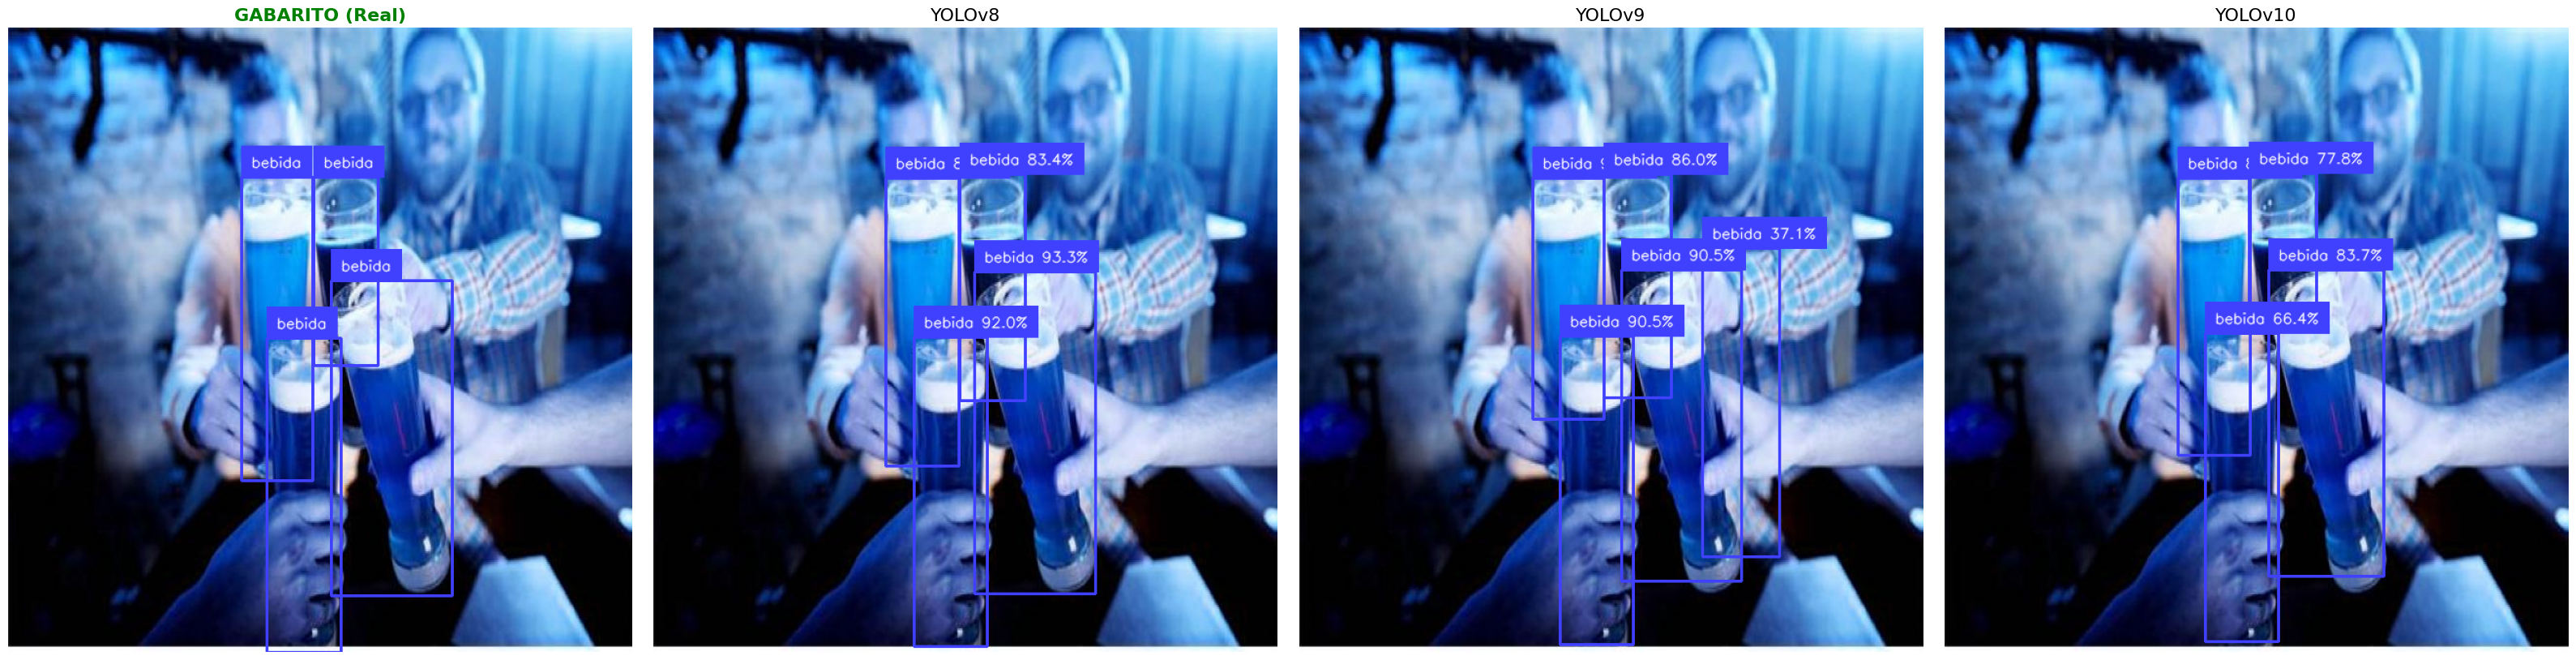

In [63]:
import matplotlib.pyplot as plt
import random
import cv2
import supervision as sv
from ultralytics import YOLO

# 1. Configuração dos caminhos dos modelos (Ajuste os nomes dos arquivos .pt)
path_v8 = f'{HOME}/BenchMark_Visao/Run_YOLOv8/weights/best.pt' # Exemplo
path_v9 = f'{HOME}/BenchMark_Visao/Run_YOLOv9/weights/best.pt' # Exemplo
path_v10 = f'{HOME}/BenchMark_Visao/Run_YOLOv10/weights/best.pt' # Exemplo

model_v8 = YOLO(path_v8)
model_v9 = YOLO(path_v9)
model_v10 = YOLO(path_v10)

# 2. Dataset
ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

i = random.randint(0, len(ds))
image_path, image, target = ds[i]

# --- NOVA FUNÇÃO QUE GERA LABELS COM % ---
def get_annotated_image(model, source_image, title_text):
    results = model(source_image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results).with_nms()
    
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    # AQUI ESTÁ O SEGREDO: Criamos uma lista de strings formatadas
    # model.names[class_id] pega o nome (ex: "Capacete")
    # confidence:.1% formata o número 0.952 para 95.2%
    labels = [
        f"{model.names[class_id]} {confidence:.1%}"
        for class_id, confidence
        in zip(detections.class_id, detections.confidence)
    ]

    img_copy = source_image.copy()
    img_copy = box_annotator.annotate(scene=img_copy, detections=detections)
    
    # Passamos a lista 'labels' aqui
    img_copy = label_annotator.annotate(
        scene=img_copy, 
        detections=detections, 
        labels=labels
    )
    
    return img_copy

# --- Preparar Ground Truth (Sem %, pois é o gabarito) ---
# Para o gabarito, precisamos pegar os nomes das classes do YAML ou de um dos modelos
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

# Vamos criar labels só com o nome para o Gabarito
ground_truth_labels = [
    f"{model_v8.names[class_id]}" 
    for class_id 
    in target.class_id
]

ground_truth_img = image.copy()
ground_truth_img = box_annotator.annotate(scene=ground_truth_img, detections=target)
ground_truth_img = label_annotator.annotate(
    scene=ground_truth_img, 
    detections=target, 
    labels=ground_truth_labels
)

# --- Gerar e Plotar ---
img_v8 = get_annotated_image(model_v8, image, "YOLOv8")
img_v9 = get_annotated_image(model_v9, image, "YOLOv9")
img_v10 = get_annotated_image(model_v10, image, "YOLOv10")

fig, axs = plt.subplots(1, 4, figsize=(32, 8))

axs[0].imshow(ground_truth_img)
axs[0].set_title("GABARITO (Real)", fontsize=16, color='green', fontweight='bold')
axs[0].axis('off')

axs[1].imshow(img_v8)
axs[1].set_title("YOLOv8", fontsize=16)
axs[1].axis('off')

axs[2].imshow(img_v9)
axs[2].set_title("YOLOv9", fontsize=16)
axs[2].axis('off')

axs[3].imshow(img_v10)
axs[3].set_title("YOLOv10", fontsize=16)
axs[3].axis('off')

plt.tight_layout()
plt.show()